Delivery time

In [87]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as smf
import statsmodels.formula.api as sm
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
upload=files.upload()

Saving delivery_time.csv to delivery_time.csv


In [88]:
df=pd.read_csv('delivery_time.csv')
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [ ]:
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [91]:
df1=df.rename({'Delivery Time':'DT','Sorting Time':'ST'},axis=1)

<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

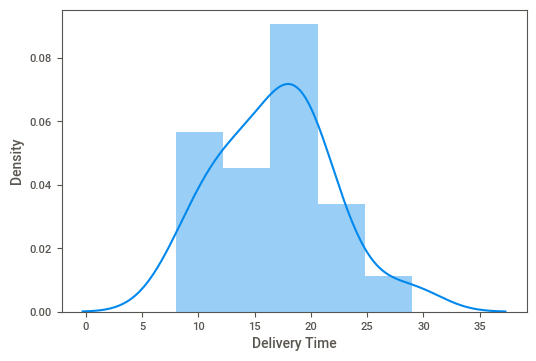

In [92]:
sns.distplot(df['Delivery Time'])

<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

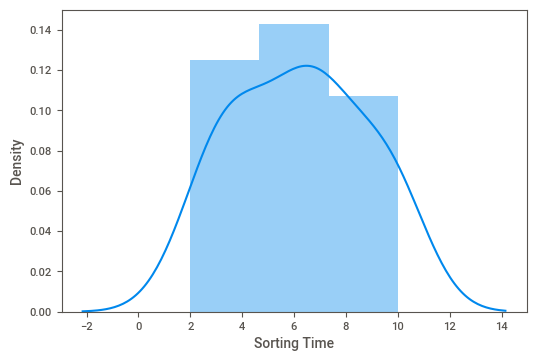

In [93]:
sns.distplot(df['Sorting Time'])

<AxesSubplot:>

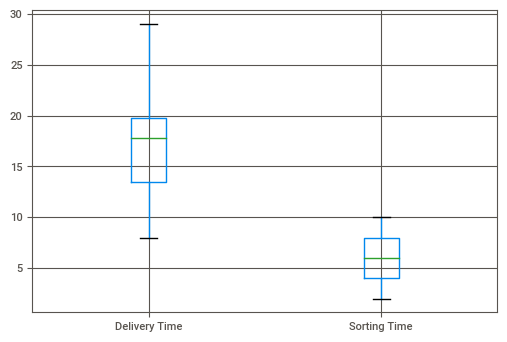

In [94]:
df.boxplot()

<AxesSubplot:>

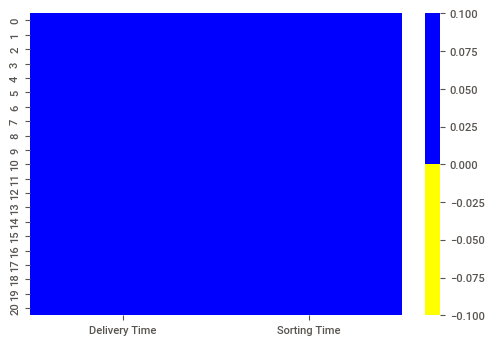

In [96]:
import seaborn as sns
cols = df.columns 
colours = ['yellow', 'blue'] 
sns.heatmap(df[cols].isnull(),
            cmap=sns.color_palette(colours))

In [97]:
!pip install sweetviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [98]:
import sweetviz as sv

In [99]:
sweet_report = sv.analyze(df)
sweet_report.show_html('Sorting_delivery.html')

                                             |          | [  0%]   00:00 -> (? left)

Report Sorting_delivery.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [100]:
corel = df.corr()
corel

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


<AxesSubplot:xlabel='Sorting Time', ylabel='Delivery Time'>

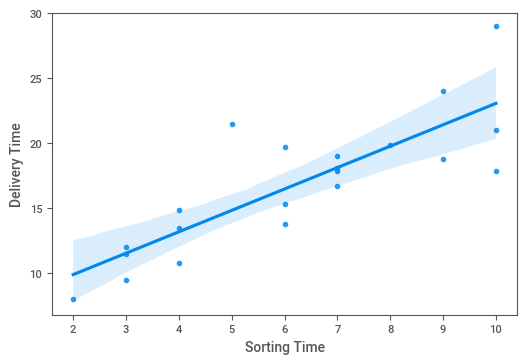

In [103]:
sns.regplot(x=df['Sorting Time'],y=df['Delivery Time'])

In [107]:
df=df.rename({'Delivery Time':'DT','Sorting Time':'ST'},axis=1)

In [108]:
model_1 = sm.ols("DT~ST",data = df).fit()

In [109]:
model_1.params

Intercept    6.582734
ST           1.649020
dtype: float64

In [110]:
model_1.tvalues , model_1.pvalues

(Intercept    3.823349
 ST           6.387447
 dtype: float64, Intercept    0.001147
 ST           0.000004
 dtype: float64)

In [111]:
model_1.rsquared , model_1.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

In [112]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     DT   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sun, 26 Feb 2023   Prob (F-statistic):           3.98e-06
Time:                        09:13:20   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
ST             1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [115]:
model_2 = sm.ols("np.log(DT)~ST",data = df).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.log(DT)   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     46.73
Date:                Sun, 26 Feb 2023   Prob (F-statistic):           1.59e-06
Time:                        09:14:10   Log-Likelihood:                 7.7920
No. Observations:                  21   AIC:                            -11.58
Df Residuals:                      19   BIC:                            -9.495
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1214      0.103     20.601      0.000       1.906       2.337
ST             0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [116]:
model_2.rsquared , model_2.rsquared_adj

(0.7109478980584187, 0.6957346295351776)

In [120]:
model_3 = sm.ols("np.log(DT)~np.log(ST)",data = df).fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.log(DT)   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     64.39
Date:                Sun, 26 Feb 2023   Prob (F-statistic):           1.60e-07
Time:                        09:15:16   Log-Likelihood:                 10.291
No. Observations:                  21   AIC:                            -16.58
Df Residuals:                      19   BIC:                            -14.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.7420      0.133     13.086      0.000       1.463       2.021
np.log(ST)     0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [121]:
model_3.rsquared , model_3.rsquared_adj

(0.77216134926874, 0.7601698413355158)

In [129]:
df["ST_sq"]= df.ST**2
model_4=sm.ols("np.log(DT)~np.log(ST_sq+ST)",data=df).fit()
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.log(DT)   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     63.34
Date:                Sun, 26 Feb 2023   Prob (F-statistic):           1.81e-07
Time:                        09:17:17   Log-Likelihood:                 10.157
No. Observations:                  21   AIC:                            -16.31
Df Residuals:                      19   BIC:                            -14.23
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              1.5875      0.153     10.372      0.000       1.267       1.908
np.log(ST_sq + ST)     0.3267      0.041      7.959      0.000       0.241       0.413
==============================================================================
Omnibus:                        1.923   Durbin-Watson:                   1.312
Prob(Omnibus):                  0.382   Jarque-Bera (JB):                1.194
Skew:                           0.583   Prob(JB):                        0.551
Kurtosis:                       2.930   Cond. No.                         17.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [130]:
model_4.rsquared , model_4.rsquared_adj

(0.7692451915083323, 0.7571002015877182)

In [131]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     DT   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sun, 26 Feb 2023   Prob (F-statistic):           3.98e-06
Time:                        09:17:24   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
ST             1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Model predictions

In [134]:
# model_1 has the R-squared:	0.682 which is considered to be a good model and the predition are made from 
# model_1
#a=input('Enter the sorting time')
a=int(input('Enter the sT:'))
newtime=pd.Series([a])
df_pred=pd.DataFrame(newtime,columns=["ST"])
b=model_1.predict(df_pred)
print("the delivery time :",b)

Enter the sT:5
the delivery time : 0    14.827833
dtype: float64


# Salary hike

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Salary_Data.csv to Salary_Data.csv


In [ ]:
sa=pd.read_csv('Salary_Data.csv')

In [ ]:
sa.shape

(30, 2)

In [ ]:
sa.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


EDA and Visualization

In [ ]:
sa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [ ]:
sa[sa.duplicated()].shape

(0, 2)

<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

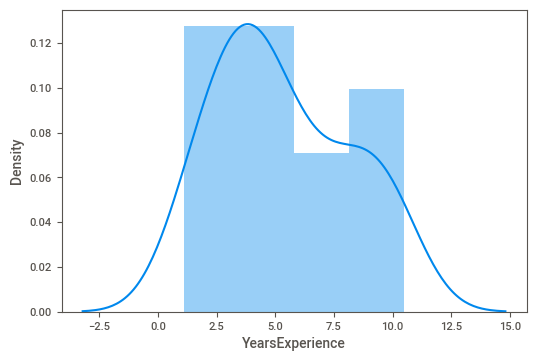

In [ ]:
sns.distplot(sa['YearsExperience'])

<AxesSubplot:xlabel='Salary', ylabel='Density'>

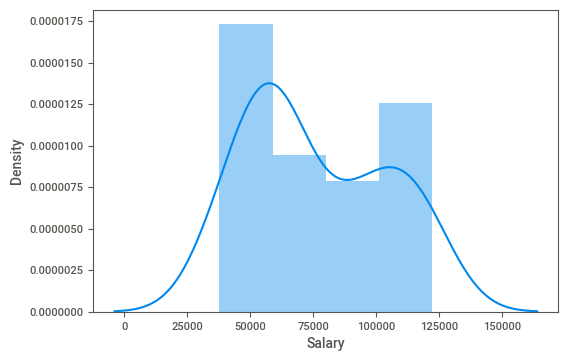

In [ ]:
sns.distplot(sa['Salary'])

<AxesSubplot:>

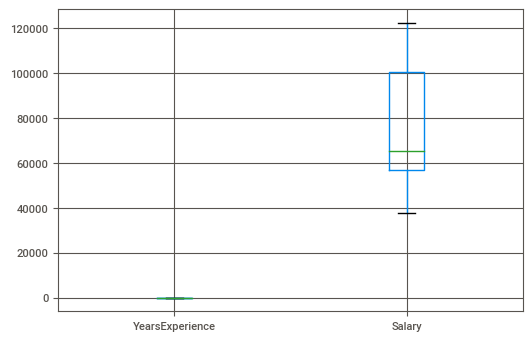

In [ ]:
sa.boxplot()

In [ ]:
sa.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


<AxesSubplot:>

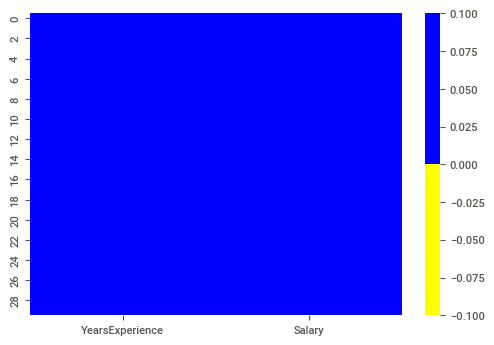

In [ ]:
import seaborn as sns
cols = sa.columns 
colours = ['yellow', 'blue'] 
sns.heatmap(sa[cols].isnull(),
            cmap=sns.color_palette(colours))

In [ ]:
sweet_report = sv.analyze(sa)
sweet_report.show_html('Salary.html')

                                             |          | [  0%]   00:00 -> (? left)

Report Salary.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:
corre=sa.corr()
corre

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

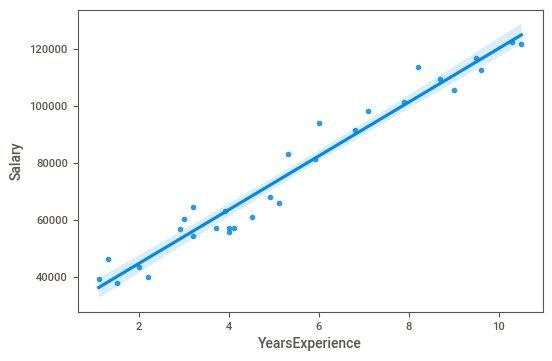

In [ ]:
sns.regplot(x=sa['YearsExperience'],y=sa['Salary'])

In [ ]:
m_1 = sm.ols("Salary~YearsExperience",data = sa).fit()
m_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Sun, 26 Feb 2023   Prob (F-statistic):           1.14e-20
Time:                        07:30:56   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
m_1.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [ ]:
m_1.tvalues , m_1.pvalues

(Intercept          11.346940
 YearsExperience    24.950094
 dtype: float64, Intercept          5.511950e-12
 YearsExperience    1.143068e-20
 dtype: float64)

In [ ]:
m_1.rsquared , m_1.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

In [ ]:
m_1.rsquared , m_1.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

In [ ]:
m_2 = sm.ols("Salary~np.log(YearsExperience)",data = sa).fit()
m_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Sun, 26 Feb 2023   Prob (F-statistic):           3.25e-13
Time:                        07:34:08   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
np.log(YearsExperience)  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
m_2.params

Intercept                  14927.97177
np.log(YearsExperience)    40581.98796
dtype: float64

In [ ]:
m_2.tvalues , m_2.pvalues

(Intercept                   2.895135
 np.log(YearsExperience)    12.791989
 dtype: float64, Intercept                  7.268813e-03
 np.log(YearsExperience)    3.250155e-13
 dtype: float64)

In [ ]:
m_2.rsquared , m_2.rsquared_adj

(0.8538888828756969, 0.8486706286926861)

In [ ]:
c=float(input('Enter the Years of Experience:'))
sal=pd.Series([c])
sa_pred=pd.DataFrame(sal,columns=["YearsExperience"])
d=m_1.predict(sa_pred)
print("salary :",d)

Enter the Years of Experience:5
salary : 0    73042.011806
dtype: float64
